# CRISP-DM: Stroke Prediction Dataset

## Objective

The objective of this notebook is to practice and understand the CRISP-DM process to analyze a data set, applying to stroke case data set.

It is also an Udacity Data science Nanodegree project.

## What is CRISP-DM

Follow a brief explaination of what is CRISP-DM.

![CRISP-DM Process Diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/479px-CRISP-DM_Process_Diagram.png)
[Image source](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png)

The **CRISP-DM** stands for **CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (CRISP-DM). It is a process model with six phases that describes the data science ( or machine learning project). The 6 phases are:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

### Business Understanding

Here, you need to identify what kind of problem you or a company want to solve it. Also, you need to explain the objective and how you will measure the success or failure of the project.

### Data Understanding

In this step, you have to collect the data, describe it, verify its quality and volume, and explore it. You may need to handle empty or wrong data types while you explore the data set.

### Data Preparation

You probably will spend more time in this stage, comparing to any another stage. You are going to select, clean, construct, integrate (when there are more than one data source) and format the data to create the final data set.

### Data Modeling

Using the data set from previous phase, you will build models based on several modeling techniques. There is not a limit to amount of models you can build here. The performance of them will be used later and according to your assess method, a model should be selected.

### Evaluation

As the name of this stage suggest, you will evaluate the model in order to check if the objective of your project is reached.

### Deploy

For this final step, you will need to plan how you will deploy your model, how you will keep monitoring and maintain it, and present the final report and review of it.


## Data set Information

#### Attribute Information

1. **id**: unique identifier
2. **gender**: "Male", "Female" or "Other"
3. **age**: age of the patient
4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. **ever_married**: "No" or "Yes"
7. **work_type**: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8. **Residence_type**: "Rural" or "Urban"
9. **avg_glucose_level**: average glucose level in blood
10. **bmi**: body mass index
11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"
12. **stroke**: 1 if the patient had a stroke or 0 if not

**Note:** *Unknown* in smoking_status means that the information is unavailable for this patient

#### Link
[Kaggle Stroke Prediction Data set](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

*this data set is for educational porpuse* 

## Business Understanding

According to WHO (World Health Organization), Stroke (or cerebrovascular accidents) is the second leading cause of death and the third leading cause of disability worldwide.

The stroke is caused by poor blood flow to the brain. This damages the part of brain which controls the parts of body.

People at risk for stroke include those who have high blood pressure, high cholesterol, diabetes, heart disease or who smokes.

The goal of this project is to find out if the stroke prediction will be performed better using only "relevant" information. In order to do that, I will analyze following points of data set and decide what I can remove from it:

- Does the information about the work type important to this data set?

- Does the marital status really relevant to predict a stroke? How about the residence type?

- Considering the people who are underweight, how much percentage of stroke cases does it represent?


## Data Understanding

### Loading the data set and exploring it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading data
df = pd.read_csv('./dataset/healthcare-dataset-stroke-data.csv')

In [2]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print('Number of elements in this dataframe: {}'.format(df.size))
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

Number of elements in this dataframe: 61320
Number of rows: 5110
Number of columns: 12


In [4]:
# checking the data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
#replace 'Other' with NaN
df.gender.replace('Other', np.nan, inplace=True)

col_names = df.columns

print('Number of missing values\n')
# checking NaN values in all columns
for col in col_names:
    print('column {}: {}'.format(col, np.sum(df[col].isnull() == True)))

Number of missing values

column id: 0
column gender: 1
column age: 0
column hypertension: 0
column heart_disease: 0
column ever_married: 0
column work_type: 0
column Residence_type: 0
column avg_glucose_level: 0
column bmi: 201
column smoking_status: 0
column stroke: 0


## Data Preparation
### Data wragling and cleaning

First of all, the ID column will be removed. It only identify the patients and it is not providing any useful information.

In [6]:
# id column is not relevant for this data set
df.drop(columns=['id'], axis=1, inplace=True)

After that, I checked how many "Other" inputs are in the gender columns.

In [7]:
# checking quantity of "Other" in the gender column
print('{}\n'.format(df.gender.value_counts()))

Female    2994
Male      2115
Name: gender, dtype: int64



As we can see, there is only 1 "Other" input in entire gender column. So, it is fine to removed it, because it represents less than 0.02% of the data.

It will be replaced by NaN value before its row is removed from the dataframe.

In [8]:
# Since there was only 1 "Other" in the gender column, I will remove it from dataframe
df.dropna(subset=['gender'], inplace=True, axis=0)

# making sure that NaN from gender column was removed
print('number of missing values in the {} column: {}'.format('gender', np.sum(df['gender'].isnull() == True)))

number of missing values in the gender column: 0


Now, let's handle the NaN values in the bmi column.

In [9]:
df.bmi.isna().value_counts()

False    4908
True      201
Name: bmi, dtype: int64

In [10]:
df.bmi.fillna(df.bmi.mean(skipna=True), inplace=True)

In [11]:
# age: convert to int
df['age'] = df.age.astype(int)

# gender: 0 = female and 1 = male
df['gender'] = df.gender.map({'Female':0, 'Male':1})

# ever_married: No = 0 and Yes = 1
df['ever_married'] = df.ever_married.map({'No':0, 'Yes':1})

# work_type: children = 0, Govt_jov = 1, Never_worked = 2, Private = 3 and Self-employed = 4
df['work_type'] = df.work_type.map({'children':0, 'Govt_job':1, 'Never_worked':2, 'Private':3, 'Self-employed':4})

# Residence_type: Rural = 0 and Urban = 1
df['Residence_type'] = df.Residence_type.map({'Rural':0, 'Urban':1})

# smoking_status: formerly smoked = 0, never smoked = 1, smokes = 2 and Unknown = 3
df['smoking_status'] = df.smoking_status.map({'formerly smoked':0, 'never smoked':1,'smokes':2,'Unknown':3})

# BMI: underweight = 0, healthy = 1, overweight = 2, obese = 3
# obese: bmi >= 30
# overweight: 25 <= bmi < 30
# healty: 18.5 < bmi < 25
# underweight: bmi <= 18.5
# underweight
df.loc[df['bmi'] < 18.6,'bmi'] = 0
# obese
df.loc[df['bmi'] > 29, 'bmi'] = 3
# healthy
df.loc[(df['bmi'] != 0) & (df['bmi'] != 3) & (df['bmi'] > 18.5) & (df['bmi'] < 25), 'bmi'] = 1
# overweight
df.loc[(df['bmi'] != 0) & (df['bmi'] != 3) & (df['bmi'] != 1), 'bmi'] = 2

# avg_glucose_level: low glucose level = 0, normal glucose level = 1, high glucose level = 2
# low glucose level
df.loc[df['avg_glucose_level'] < 72,'avg_glucose_level'] = 0
# high glucose level
df.loc[df['avg_glucose_level'] > 99, 'avg_glucose_level'] = 2
# normal glucose level
df.loc[(df['avg_glucose_level'] != 2) & (df['avg_glucose_level'] != 0), 'avg_glucose_level'] = 1

Link to know more about BMI: [here](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

According to [diabetes.co.uk](https://www.diabetes.co.uk/diabetes_care/blood-sugar-level-ranges.html), the normal glucose level range is 4 - 5.5 mmol/L (72 to 99 mg/dL).

For this dataset, I will consider that all glucose level measurements were done before any meals.

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,3,1,2.0,3.0,0,1
1,0,61,0,0,1,4,0,2.0,2.0,1,1
2,1,80,0,1,1,3,0,2.0,3.0,1,1
3,0,49,0,0,1,3,1,2.0,3.0,2,1
4,0,79,1,0,1,4,0,2.0,1.0,1,1


<AxesSubplot:xlabel='age', ylabel='count'>

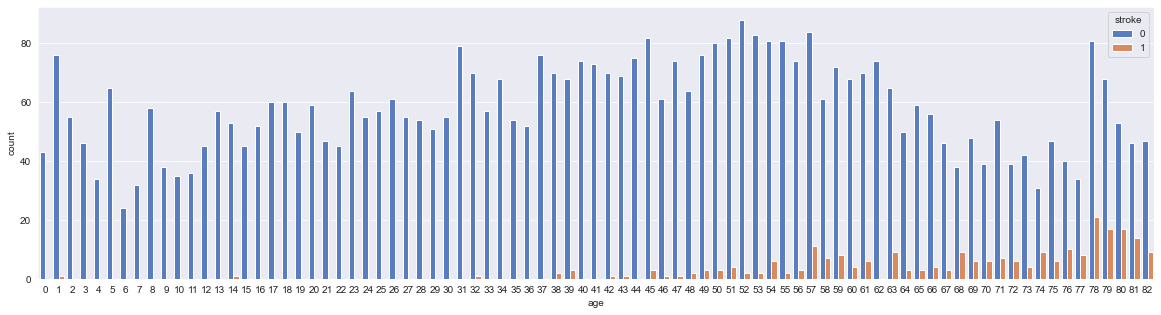

In [13]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
sns.countplot(data=df, x='age', hue='stroke', palette="muted")

In [14]:
print('Number of cases between 0 to 37 years old: {}'.format(np.sum((df['age'] <= 37) & (df['stroke'] == 1))))

Number of cases between 0 to 37 years old: 3


In [15]:
print('Total of stroke cases: {}'.format(np.sum(df['stroke'] == 1)))

Total of stroke cases: 249


The stroke cases are more common to who is 38 years old or older. For people younger than that age, stroke is rare (it represents less than 1% of total).

Due to this fact, I am removing the data between 0 to 37 ages from dataframe.

In [16]:
df = df.loc[df['age'] > 37]

<AxesSubplot:xlabel='age', ylabel='count'>

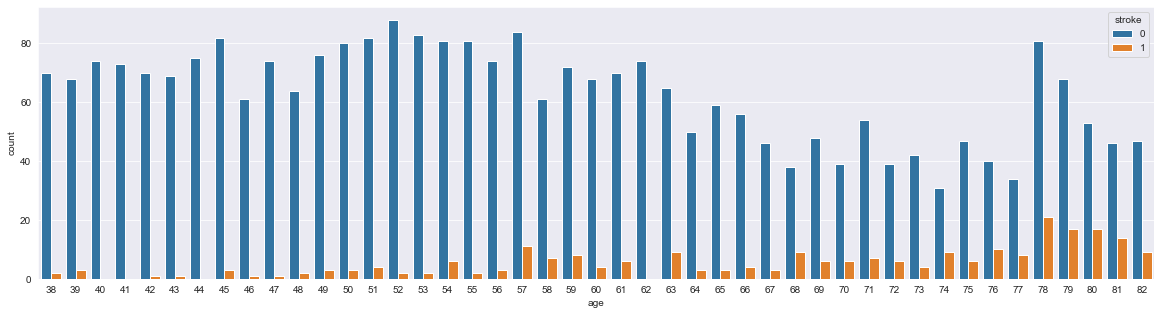

In [17]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
sns.countplot(data=df, x='age', hue='stroke')

## Correlation matrix

<AxesSubplot:>

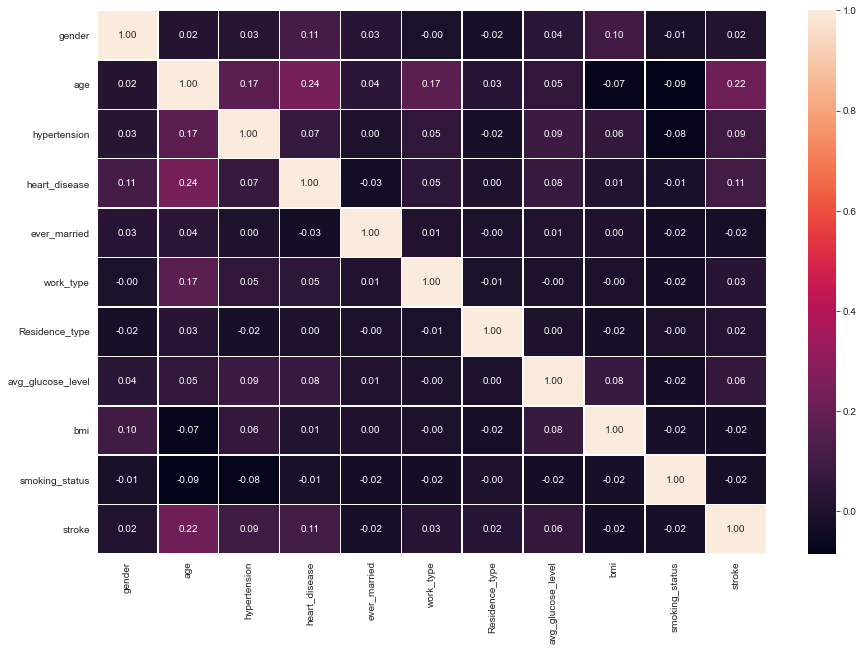

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt=".2f")

## Exploring the correlation and answering the questions

### **Question 1: Does the information about the work type important to this data set?**

Taking a look into Correlation Matrix, stroke has minor correlation to work_type (0.03), comparing to another stroke risks factors. Also, there are correlations to hypertension (0.11) and heart_disease (0.11), two of main stroke cases. It is curious that work type is not correlated to avg_glucose_level.

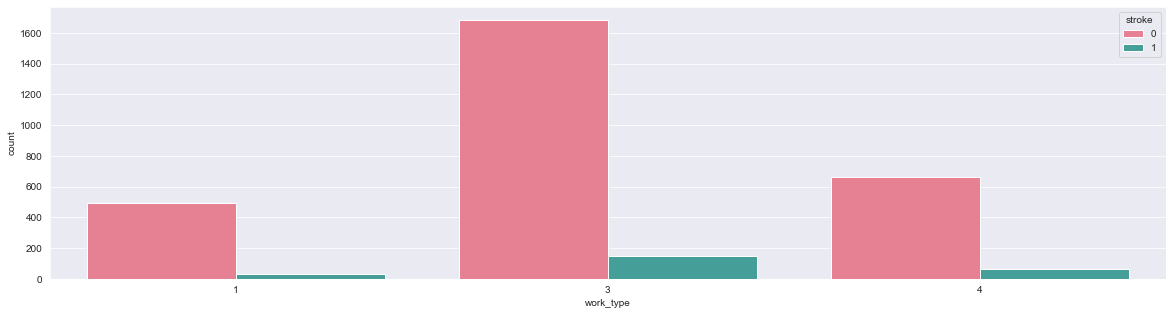

In [19]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
fig = sns.countplot(data=df, x='work_type', hue='stroke', palette='husl')

In [20]:
print('Work type 1 stroke cases: {:.3}%'.format(100 * np.sum((df['work_type'] == 1) & (df['stroke'] == 1))/df.work_type.size))
print('Work type 3 stroke cases: {:.3}%'.format(100 * np.sum((df['work_type'] == 3) & (df['stroke'] == 1))/df.work_type.size))
print('Work type 4 stroke cases: {:.3}%'.format(100 * np.sum((df['work_type'] == 4) & (df['stroke'] == 1))/df.work_type.size))

Work type 1 stroke cases: 1.07%
Work type 3 stroke cases: 4.8%
Work type 4 stroke cases: 2.11%


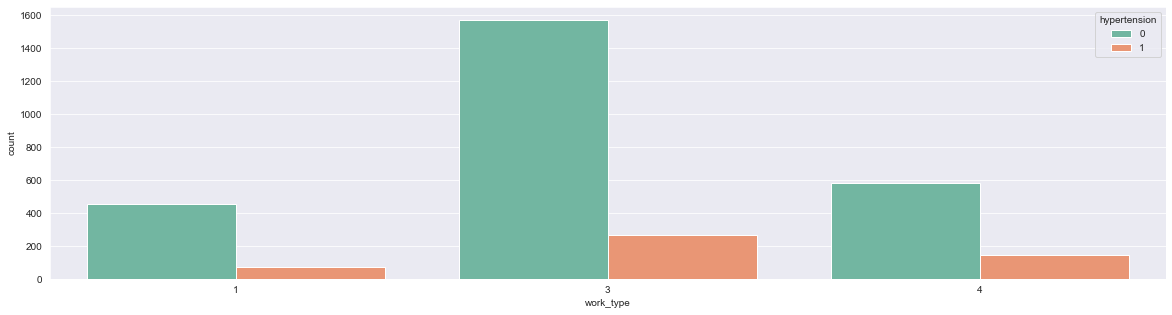

In [21]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
fig = sns.countplot(data=df, x='work_type', hue='hypertension', palette='Set2')

In [22]:
print('Work type 1 hypertension: {:.3}%'.format(100 * np.sum((df['work_type'] == 1) & (df['hypertension'] == 1)) \
                                                / df.work_type.size))
print('Work type 3 hypertension: {:.3}%'.format(100 * np.sum((df['work_type'] == 3) & (df['hypertension'] == 1)) \
                                                / df.work_type.size))
print('Work type 4 hypertension: {:.3}%'.format(100 * np.sum((df['work_type'] == 4) & (df['hypertension'] == 1)) \
                                                / df.work_type.size))

Work type 1 hypertension: 2.24%
Work type 3 hypertension: 8.53%
Work type 4 hypertension: 4.61%


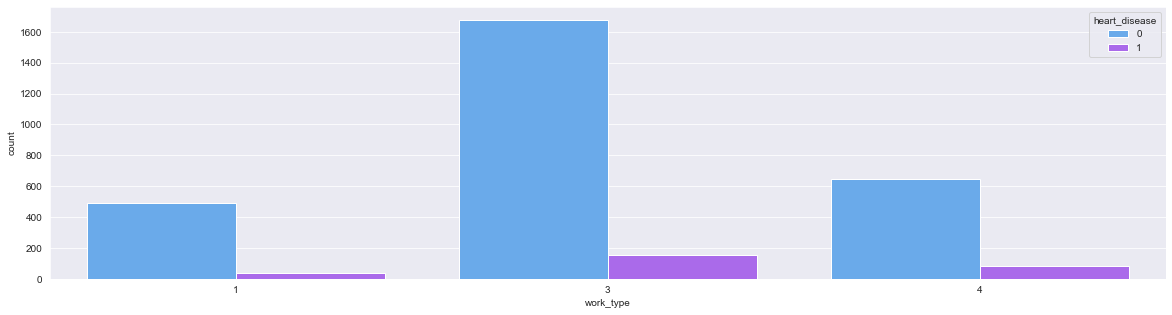

In [23]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
fig = sns.countplot(data=df, x='work_type', hue='heart_disease', palette = 'cool')

In [24]:
print('Work type 1 heart disease: {:.3}%'.format(100 * np.sum((df['work_type'] == 1) & (df['heart_disease'] == 1)) \
                                                 /df.work_type.size))
print('Work type 3 heart disease: {:.3}%'.format(100 * np.sum((df['work_type'] == 3) & (df['heart_disease'] == 1)) \
                                                 /df.work_type.size))
print('Work type 4 heart disease: {:.3}%'.format(100 * np.sum((df['work_type'] == 4) & (df['heart_disease'] == 1)) \
                                                 /df.work_type.size))

Work type 1 heart disease: 1.17%
Work type 3 heart disease: 5.06%
Work type 4 heart disease: 2.63%


From these informations, the people who work for governament or are self-employered have lower chances to develop hypertension or/and heart disease than those who work for a private company. So, depending of type of work it is possible to prevent hypertension and/or heart disease, which are 2 of main conditions to have a stroke. 

### **Does the marital status really relevant to predict a stroke? How about the residence type?**

Text(0.5, 1.0, 'Stroke cases x ever_married')

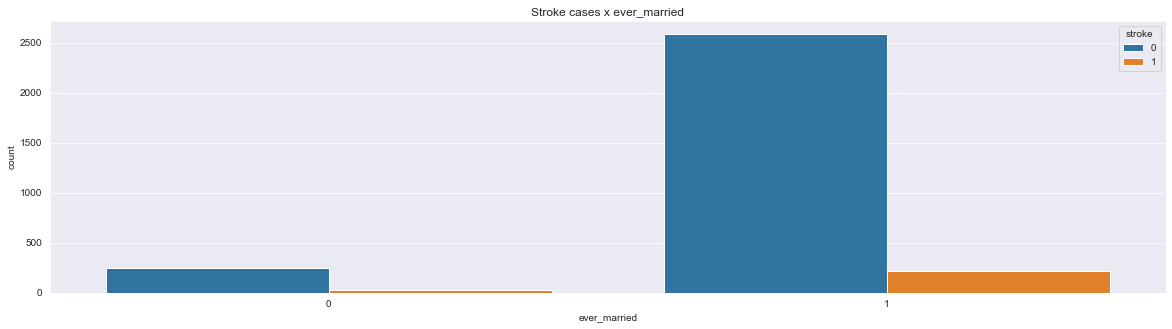

In [25]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
fig = sns.countplot(data=df, x='ever_married', hue='stroke', palette='tab10')
plt.title('Stroke cases x ever_married')

In [26]:
# dataframe getting only stroke case
df_stroke = df.copy()
df_stroke = df_stroke.loc[df['stroke'] == 1]

Text(0.5, 1.0, 'Stroke cases (positives) x ever_married')

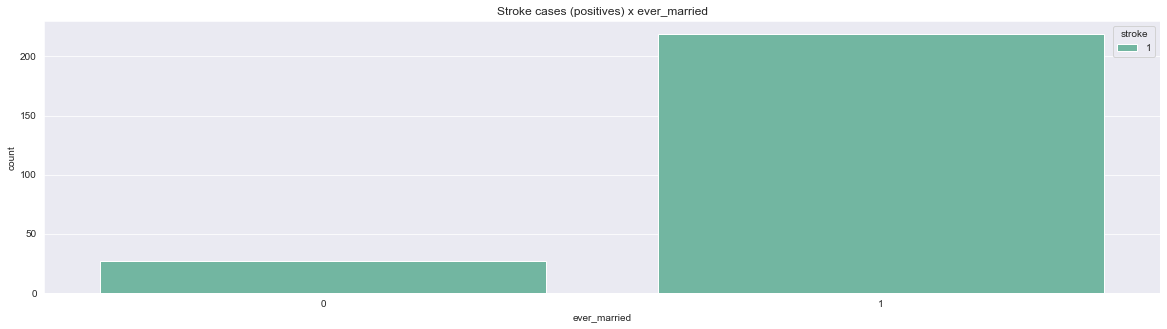

In [27]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
fig = sns.countplot(data=df_stroke, x='ever_married', hue='stroke', palette='Set2')
plt.title('Stroke cases (positives) x ever_married')

In [28]:
stroke_ever_married = np.sum((df['ever_married'] == 1) & (df['stroke'] == 1))
stroke_single = np.sum((df['ever_married'] == 0) & (df['stroke'] == 1))
column_size = df.ever_married.size

print('Stroke cases x ever_married (in percentage)\n')
print('Ever married: {:.3}% ({} cases)'.format(100 * stroke_ever_married/column_size, stroke_ever_married))
print('Single: {:.3}% ({} cases)'.format(100 * stroke_single/column_size, stroke_single))
print('Difference: {} cases'.format(stroke_ever_married - stroke_single))

Stroke cases x ever_married (in percentage)

Ever married: 7.1% (219 cases)
Single: 0.876% (27 cases)
Difference: 192 cases


From these informations, ever married people have more chance to have a stroke comparing to single people.

As a conclusion, this data may help to predict the stroke.

Now, let's see about the residence type.

Urban residence: 1567
Rural residence: 1516
Diff: 51 (or 0.0165%)


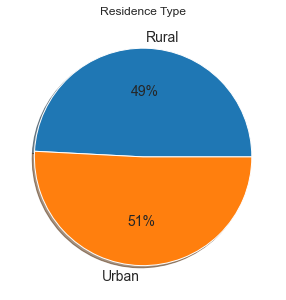

In [29]:
#resident type
stroke_urban = np.sum(df['Residence_type'] == 1)
stroke_rural = np.sum(df['Residence_type'] == 0)
res_diff = stroke_urban - stroke_rural

print('Urban residence: {}'.format(stroke_urban))
print('Rural residence: {}'.format(stroke_rural))
print('Diff: {} (or {:.3}%)'.format(res_diff, res_diff/(stroke_urban + stroke_rural)))

fig, ax = plt.subplots(figsize=(10,5))
labels = ['Rural', 'Urban']
sizes = [stroke_rural, stroke_urban]
ax.pie(x=sizes, labels=labels, shadow=True, autopct='%.0f%%', textprops={'fontsize': 14})
ax.set_title('Residence Type')
plt.show()

As the correlation matrix already show us, there is not significant correlation between stroke and residence type. This can be verified finding the diff between the types. The difference of urban and rural residence is 0.015%. So, the residence type is not relevant to develop a condition to have a stroke.

### **Question 3: Considering the people who are underweight, how much percentage of stroke cases does it represent?**

The following table was extracted from Center for Disease Control and Prevention [website](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

| BMI           | Weight Status            |
|:-------------:|:------------------------:|
| Below 18.5    | Underweight              |
| 18.5 - 24.9   | Normal or Healthy weight |
| 25.0 - 29.9   | Overweight               |
| Above 30      | Obese                    |

Text(0.5, 1.0, 'Stroke x BMI')

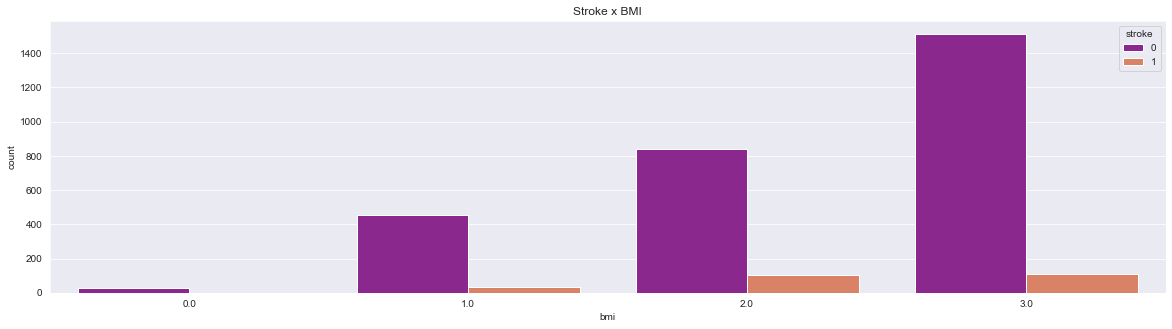

In [30]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
fig = sns.countplot(data=df, x='bmi', hue='stroke', palette='plasma')
plt.title('Stroke x BMI')

In [31]:
# stroke case divided in 4 by bmi
stroke_case_obese = np.sum((df['bmi'] == 3) & (df['stroke'] == 1))
stroke_case_overweight = np.sum((df['bmi'] == 2) & (df['stroke'] == 1))
stroke_case_healthy = np.sum((df['bmi'] == 1) & (df['stroke'] == 1))
stroke_case_underweight = np.sum((df['bmi'] == 0) & (df['stroke'] == 1))

print('Stroke cases divided by bmi\n')
print('Obese: {} stroke cases'.format(stroke_case_obese))
print('Overweight: {} stroke cases'.format(stroke_case_overweight))
print('Healthy: {} stroke cases'.format(stroke_case_healthy))
print('Underweight: {} stroke cases'.format(stroke_case_underweight))

Stroke cases divided by bmi

Obese: 108 stroke cases
Overweight: 102 stroke cases
Healthy: 35 stroke cases
Underweight: 1 stroke cases


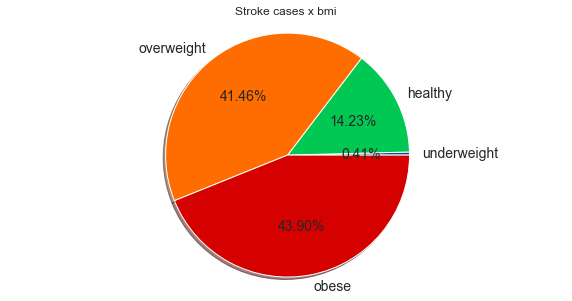

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
labels = ['underweight', 'healthy', 'overweight', 'obese']
colors = ['#0D47A1', '#00C853', '#FF6D00', '#D50000']
bmi = [stroke_case_underweight, stroke_case_healthy, stroke_case_overweight, stroke_case_obese]
ax.pie(x=bmi, labels=labels, shadow=True, autopct='%.2f%%', textprops={'fontsize': 14}, colors=colors)
ax.axis('equal')
ax.set_title('Stroke cases x bmi')
plt.show()

The following charts will count and give us an idea of how many stroke cases there are basing on 3 main risk factors: hypertension, heart disease and glucose level.

Text(0.5, 1.0, 'Stroke cases: bmi x hypertension')

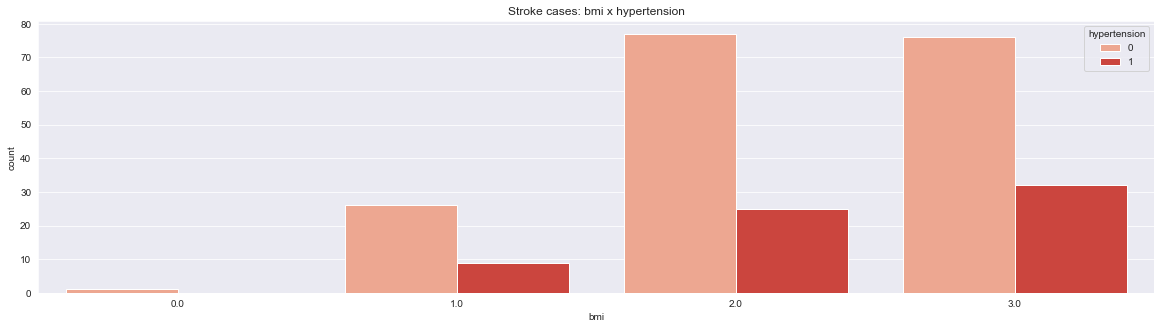

In [33]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
fig = sns.countplot(data=df_stroke, x='bmi', hue='hypertension', palette='Reds')
plt.title('Stroke cases: bmi x hypertension')

Text(0.5, 1.0, 'Stroke cases: bmi x heart_disease')

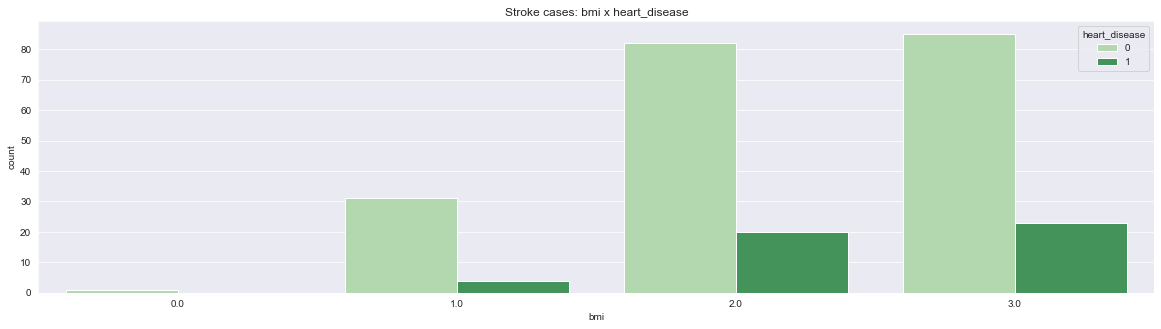

In [34]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
fig = sns.countplot(data=df_stroke, x='bmi', hue='heart_disease', palette='Greens')
plt.title('Stroke cases: bmi x heart_disease')

Text(0.5, 1.0, 'Stroke cases: bmi x avg_glucose_level')

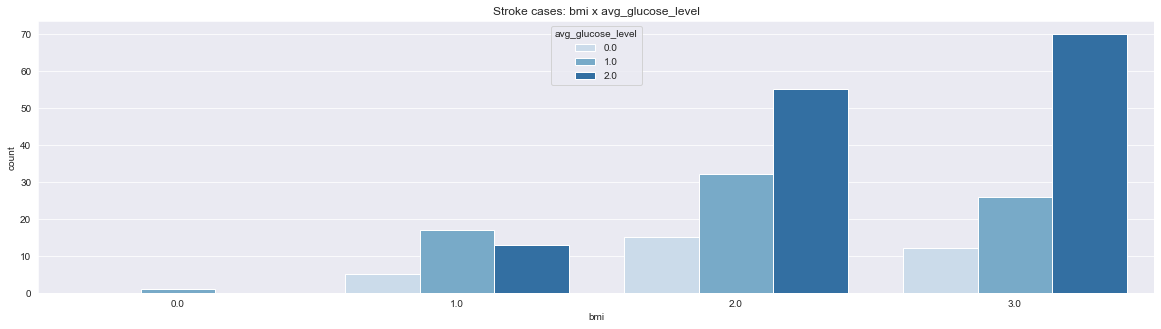

In [35]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
fig = sns.countplot(data=df_stroke, x='bmi', hue='avg_glucose_level', palette='Blues')
plt.title('Stroke cases: bmi x avg_glucose_level')

The stroke cases for underweight patients are rare and the amount of samples from this category isn't significant. Considering this fact, I can remove underweight rows from the data frame.

In [36]:
final_df = df.copy()
final_df.drop(final_df[(final_df.bmi == 0)].index, inplace=True)
final_df.drop(df['Residence_type'], inplace=True)

### Modeling

In [37]:
from numpy import unique
from numpy import argmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Synthetic Minority Over-Sampling Technique
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# the data is unbalanced due to majority of data are about negative cases.
# unbalanced data will be biased in favor of majority class.
# in order to balance it, smote is used here.
smote = SMOTE(random_state=42)

# all: before removing the Residence_type column and underweight values from bmi
X_all = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',\
        'avg_glucose_level', 'bmi','Residence_type','smoking_status']]

y_all = df[['stroke']]

# final: only relevant features
X_final = final_df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',\
        'avg_glucose_level', 'bmi','smoking_status']]

y_final = final_df[['stroke']]

# preparing the training and test data using all features
# number of features
n_features = X_all.shape[1]

# number of classes
n_class = len(unique(y_all))

# resample the dataset
x_oversample, y_oversample = smote.fit_resample(X_all, y_all.values.ravel())

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(x_oversample,
                                                                    y_oversample,
                                                                    test_size=0.4,
                                                                    random_state=42,
                                                                    shuffle=True)

# normalize data
scaler = StandardScaler()
X_all_train = scaler.fit_transform(X_all_train)
X_all_test = scaler.transform(X_all_test)

# preparing the training and test data using relevant features
# number of features
n_features = X_final.shape[1]

# number of classes
n_class = len(unique(y_final))

# resample the dataset
x_oversample, y_oversample = smote.fit_resample(X_final, y_final.values.ravel())

X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(x_oversample,
                                                                            y_oversample,
                                                                            test_size=0.4,
                                                                            random_state=42,
                                                                            shuffle=True)

# normalize data
scaler = StandardScaler()
X_final_train = scaler.fit_transform(X_final_train)
X_final_test = scaler.transform(X_final_test)

Here, we are going to use 3 kind of models: Logistic Regression, Random Forest and Neural Network.

* Logistic Regression: The one of most simple and commonly used machine learning algorithm for binary classification problem.

* Random Forest: It is a supervised learning algorithm. It is most flexible and easy to use algorithm.

* Neural Network (NN): It is a network of nodes, building the similar structure as the biologica neuron network. It is usually composed by 3 layers: input layer, hidden layer and output layer. Below, you can check a simple NN figure.

![Example of Neural Network](https://cdn.chipkin.com/assets/uploads/2020/Jun/Neural%20Network%20Diagram_26-17-07-01.png)
[Image source](https://cdn.chipkin.com/assets/uploads/2020/Jun/Neural%20Network%20Diagram_26-17-07-01.png)


There is no amount of models to be used in this step. You can use any model or algorithm that you think it will predict better your dataset.

In following cells, I will train and evaluate each one of models.

### Logistic Regression

In [38]:
# logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#model using all features
lrm_all = LogisticRegression(random_state = 42)
lrm_all.fit(X_all_train, y_all_train)
y_pred_lrm_all = lrm_all.predict(X_all_test)
cr_lrm_all = metrics.classification_report(y_all_test, y_pred_lrm_all)

#model using relevant features
lrm_final = LogisticRegression(random_state = 42)
lrm_final.fit(X_final_train, y_final_train)
y_pred_lrm_final = lrm_final.predict(X_final_test)
cr_lrm_final = metrics.classification_report(y_final_test, y_pred_lrm_final)

In [39]:
print(cr_lrm_all)
print(cr_lrm_final)

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1149
           1       0.71      0.72      0.71      1121

    accuracy                           0.71      2270
   macro avg       0.71      0.71      0.71      2270
weighted avg       0.71      0.71      0.71      2270

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1136
           1       0.70      0.69      0.70      1113

    accuracy                           0.70      2249
   macro avg       0.70      0.70      0.70      2249
weighted avg       0.70      0.70      0.70      2249



### Random Forest

In [40]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

#model using all features
rfm_all = RandomForestClassifier(n_estimators = 100)
rfm_all.fit(X_all_train, y_all_train)
y_pred_rfm_all = rfm_all.predict(X_all_test)
cr_rfm_all = metrics.classification_report(y_all_test, y_pred_rfm_all)

#model using relevant features
rfm_final = RandomForestClassifier(n_estimators = 100)
rfm_final.fit(X_final_train, y_final_train)
y_pred_rfm_final = rfm_final.predict(X_final_test)
cr_rfm_final = metrics.classification_report(y_final_test, y_pred_rfm_final)

In [41]:
print(cr_rfm_all)
print(cr_rfm_final)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1149
           1       0.92      0.93      0.93      1121

    accuracy                           0.93      2270
   macro avg       0.93      0.93      0.93      2270
weighted avg       0.93      0.93      0.93      2270

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1136
           1       0.92      0.91      0.92      1113

    accuracy                           0.92      2249
   macro avg       0.92      0.92      0.92      2249
weighted avg       0.92      0.92      0.92      2249



### Neural Network

In [42]:
from sklearn.neural_network import MLPClassifier

#model using all features
mlp_all = MLPClassifier(hidden_layer_sizes=(32,8),max_iter=300, activation='relu', solver='adam',
                   batch_size = 16, learning_rate = 'constant', learning_rate_init = 0.004,
                   shuffle = True, verbose = True, random_state = 42, tol=0.00001)

mlp_all.fit(X_all_train, y_all_train)
y_pred_mlp_all = mlp_all.predict(X_all_test)
cr_mlp_all = metrics.classification_report(y_all_test, y_pred_mlp_all)

#model using relevant features
mlp_final = MLPClassifier(hidden_layer_sizes=(32,8),max_iter=300, activation='relu', solver='adam',
                   batch_size = 16, learning_rate = 'constant', learning_rate_init = 0.004,
                   shuffle = True, verbose = True, random_state = 42, tol=0.00001)

mlp_final.fit(X_final_train, y_final_train)
y_pred_mlp_final = mlp_final.predict(X_final_test)
cr_mlp_final = metrics.classification_report(y_final_test, y_pred_mlp_final)

Iteration 1, loss = 0.58116372
Iteration 2, loss = 0.51044682
Iteration 3, loss = 0.48580788
Iteration 4, loss = 0.47000676
Iteration 5, loss = 0.45714455
Iteration 6, loss = 0.45444714
Iteration 7, loss = 0.44434707
Iteration 8, loss = 0.43712617
Iteration 9, loss = 0.43427481
Iteration 10, loss = 0.42405582
Iteration 11, loss = 0.42372731
Iteration 12, loss = 0.41699788
Iteration 13, loss = 0.41402463
Iteration 14, loss = 0.40927206
Iteration 15, loss = 0.40394385
Iteration 16, loss = 0.40518036
Iteration 17, loss = 0.39301396
Iteration 18, loss = 0.39014624
Iteration 19, loss = 0.39103395
Iteration 20, loss = 0.38502058
Iteration 21, loss = 0.38093141
Iteration 22, loss = 0.38345799
Iteration 23, loss = 0.37892933
Iteration 24, loss = 0.37617460
Iteration 25, loss = 0.37646159
Iteration 26, loss = 0.36540962
Iteration 27, loss = 0.36681403
Iteration 28, loss = 0.36116976
Iteration 29, loss = 0.35693640
Iteration 30, loss = 0.35992967
Iteration 31, loss = 0.35234534
Iteration 32, los

Iteration 75, loss = 0.29758883
Iteration 76, loss = 0.29743244
Iteration 77, loss = 0.29419176
Iteration 78, loss = 0.29175760
Iteration 79, loss = 0.28963732
Iteration 80, loss = 0.29266610
Iteration 81, loss = 0.29986133
Iteration 82, loss = 0.29411029
Iteration 83, loss = 0.29167933
Iteration 84, loss = 0.28908198
Iteration 85, loss = 0.28404410
Iteration 86, loss = 0.28869058
Iteration 87, loss = 0.28478896
Iteration 88, loss = 0.28355748
Iteration 89, loss = 0.29007639
Iteration 90, loss = 0.28078197
Iteration 91, loss = 0.29353952
Iteration 92, loss = 0.28278882
Iteration 93, loss = 0.28790038
Iteration 94, loss = 0.28719883
Iteration 95, loss = 0.28395758
Iteration 96, loss = 0.27361208
Iteration 97, loss = 0.27808418
Iteration 98, loss = 0.27290888
Iteration 99, loss = 0.28392266
Iteration 100, loss = 0.27663454
Iteration 101, loss = 0.27145450
Iteration 102, loss = 0.27984877
Iteration 103, loss = 0.27703723
Iteration 104, loss = 0.28240030
Iteration 105, loss = 0.27567948
It

In [43]:
print(cr_mlp_all)
print(cr_mlp_final)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1149
           1       0.82      0.83      0.82      1121

    accuracy                           0.83      2270
   macro avg       0.83      0.83      0.83      2270
weighted avg       0.83      0.83      0.83      2270

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1136
           1       0.87      0.82      0.84      1113

    accuracy                           0.85      2249
   macro avg       0.85      0.85      0.85      2249
weighted avg       0.85      0.85      0.85      2249



### Evaluation

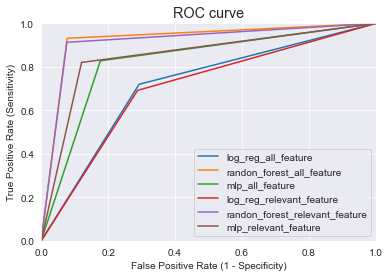

In [44]:
# ROC Curve (Receiver Operating Characteristic Curve)
# for models using all features
fpr_lrm_all, tpr_lrm_all, threshold_lrm_all = metrics.roc_curve(y_all_test, y_pred_lrm_all)
fpr_rfm_all, tpr_rfm_all, threshold_rfm_all = metrics.roc_curve(y_all_test, y_pred_rfm_all)
fpr_mlp_all, tpr_mlp_all, threshold_mlp_all = metrics.roc_curve(y_all_test, y_pred_mlp_all)
# for models using relevant features
fpr_lrm_final, tpr_lrm_final, threshold_lrm_final = metrics.roc_curve(y_final_test, y_pred_lrm_final)
fpr_rfm_final, tpr_rfm_final, threshold_rfm_final = metrics.roc_curve(y_final_test, y_pred_rfm_final)
fpr_mlp_final, tpr_mlp_final, threshold_mlp_final = metrics.roc_curve(y_final_test, y_pred_mlp_final)

plt.plot(fpr_lrm_all, tpr_lrm_all, label="log_reg_all_feature")
plt.plot(fpr_rfm_all, tpr_rfm_all, label="randon_forest_all_feature")
plt.plot(fpr_mlp_all, tpr_mlp_all, label="mlp_all_feature")
plt.plot(fpr_lrm_final, tpr_lrm_final, label="log_reg_relevant_feature")
plt.plot(fpr_rfm_final, tpr_rfm_final, label="randon_forest_relevant_feature")
plt.plot(fpr_mlp_final, tpr_mlp_final, label="mlp_relevant_feature")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

In [45]:
# AUC (Area Under the Curve)

print('ROC AUD')
print('Using all features:')
print('Logistic Regression: {}'.format(metrics.auc(fpr_lrm_all, tpr_lrm_all)))
print('Random Forest: {}'.format(metrics.auc(fpr_rfm_all, tpr_rfm_all)))
print('MLP: {}'.format(metrics.auc(fpr_mlp_all, tpr_mlp_all)))
print('\nUsing relevant features:')
print('Logistic Regression: {}'.format(metrics.auc(fpr_lrm_final, tpr_lrm_final)))
print('Random Forest: {}'.format(metrics.auc(fpr_rfm_final, tpr_rfm_final)))
print('MLP: {}'.format(metrics.auc(fpr_mlp_final, tpr_mlp_final)))

ROC AUD
Using all features:
Logistic Regression: 0.7137323771436823
Random Forest: 0.9269263347331466
MLP: 0.8255784613545192

Using relevant features:
Logistic Regression: 0.7019858933475064
Random Forest: 0.9181318255444617
MLP: 0.8498534445667718


Using relevant data, the regression models had lower performance than when we trained them using previous data frame. In another hand, the MLP model performance is greater than before.

Dispite of fact that, using final data frame the Random Forest model had lower score, it is less overfitting to the data set. So, I would call it as an improvement in this case.

If I need to pick a model, I would choose the MLP model to deploy it, because it is less likely to be overfitting to the data set, like the Random Forest model, and it is better than Logistic Regression model.

## Deploy

In this step, the selected model should be deployed to production, for example, using AWS service. However, it is not my intention to do it, because this notebook is for study porpuse and to help me and other people to understand (or at least have an idea) of how CRISP-DM works.